# ニューラルネットワークを使った手書き文字認識モデルの使用

## モジュールのインポート

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# 画像の取り扱いに使用するモジュール
from PIL import Image, ImageOps

In [2]:
# 学習済みモデルの読み込み
from keras.models import load_model

Using TensorFlow backend.


## モデルの読み込み

In [3]:
# SimpleClassifierModel.ipynbのIn [19]:で指定したパスを指定
model_path = '../model/simple_model.h5'
model = load_model(model_path)

## サンプル画像の読み込み

In [4]:
def load_img(filepath):
    """
    画像ファイルを読み込み、前処理をする関数
    入力：
        filepath (str) : 画像ファイル
    出力：
        image (numpy.ndarray) : 先頭に次元を追加した前処理済み画像配列
    """
    
    # 画像ファイルを読み込み、グレースケール化
    image = Image.open(filepath)
    image = ImageOps.grayscale(image)
    # 画像をモデルで使える形式に変換
    image = image.resize((28, 28))
    image = np.array(image)
    image = (image - 127.5) / 127.5
    image = image.astype(np.float32)
    image = np.expand_dims(image, axis=0)
    return image

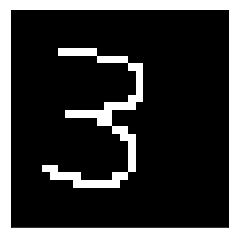

In [5]:
# サンプル画像の表示
img = load_img('../sample/three.png')
plt.imshow(img[0], cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

## サンプル画像の予測

In [6]:
prediction = model.predict_classes(img)
print('これは', prediction[0], 'です')

これは 5 です
